In [21]:
# !pip install seaborn 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

select the SN file path,
df.head() shows top 5 rows


In [23]:

df=pd.read_csv(r"SN.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [24]:
df.shape

(400, 3)

### checks if there are any null values in every row and col

In [25]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### defining the columns of x = (n rows and 2(0,1) columns) and y = nrows and 1column

In [26]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values


In [27]:
x.max()

150000

In [28]:
x.shape

(400, 2)

In [29]:
y.shape

(400,)

#### splits the testing data(25%) and training data(75%)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=3)

In [31]:
x_test.shape

(100, 2)

In [32]:
y_test.shape

(100,)

In [33]:
x_train.shape

(300, 2)

In [34]:
y_train.shape

(300,)

#### By using StandardScaler it is used to find the mean and variance of the data

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
x_train

array([[-0.3421581 ,  1.27208252],
       [-1.82711187,  0.37301368],
       [-0.99182537, -0.46611725],
       [-1.17744459,  0.28310679],
       [ 1.88527256, -1.39515506],
       [-0.52777732,  1.96136864],
       [-1.08463498, -1.57496883],
       [ 0.40031879,  1.15220668],
       [-0.62058693,  0.13326198],
       [ 0.77155723, -1.42512402],
       [ 0.21469957, -0.67589998],
       [ 2.07089178,  0.40298264],
       [-0.89901576, -0.31627244],
       [-1.64149265, -1.00555856],
       [-0.3421581 , -0.79577583],
       [ 0.86436684, -1.48506195],
       [ 0.30750918,  0.31307575],
       [-1.36306382,  0.37301368],
       [ 0.40031879,  0.31307575],
       [ 0.77155723,  0.37301368],
       [ 0.21469957, -0.37621037],
       [-1.27025421, -0.3462414 ],
       [-0.06372927, -0.22636556],
       [-1.08463498, -1.60493779],
       [ 0.95717645, -1.18537233],
       [-1.17744459,  0.31307575],
       [ 0.30750918,  0.0433551 ],
       [-0.43496771,  2.38093411],
       [ 1.42122451,

In [37]:
x_test

array([[ 0.77155723,  0.13326198],
       [ 0.86436684, -1.33521714],
       [ 1.97808217, -1.21534129],
       [-1.64149265, -0.61596206],
       [-0.99182537,  0.58279641],
       [ 0.21469957,  0.25313783],
       [ 1.23560528, -1.39515506],
       [-1.36306382, -0.64593102],
       [ 0.58593801, -0.91565167],
       [-0.99182537, -1.57496883],
       [ 0.30750918, -0.28630348],
       [ 0.12188996, -0.82574479],
       [ 0.77155723,  0.55282745],
       [-0.24934849, -0.49608621],
       [-1.08463498, -1.12543441],
       [-1.27025421, -1.51503091],
       [-0.71339654, -0.61596206],
       [-1.27025421,  0.4329516 ],
       [-0.06372927,  2.02130657],
       [ 0.21469957, -0.28630348],
       [-0.52777732,  0.49288952],
       [-0.3421581 , -1.33521714],
       [-0.80620615,  0.31307575],
       [ 0.40031879, -0.13645867],
       [-0.43496771,  1.30205149],
       [-0.62058693, -0.3462414 ],
       [ 0.40031879, -0.46611725],
       [ 1.32841489,  2.41090307],
       [ 0.30750918,

### This code creates and trains a logistic regression classifier that learns from your training data and then can be used to classify new unseen data.

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_train_pred = model.predict(x_train)
y_test_pred= model.predict(x_test)

In [40]:
pd.DataFrame({"y_train":y_train,"y_train_pred":y_train_pred})

,y_train,y_train_pred
0,1,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
295,0,0
296,0,0
297,1,0
298,0,0


In [41]:
# pd.DataFrame({"x_train":x_train,"x_test_pred":x_test_pred})

In [42]:
model.score(x_train,y_train)

0.8433333333333334

In [43]:
model.intercept_

array([-1.08532986])

In [44]:
model.coef_

array([[2.29936782, 1.16887417]])

In [45]:
# model.predict(x_train)

In [46]:
model.score(x_test,y_test)

0.84

### Accuracy of the model

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_train,y_train_pred)
print(accuracy_score)

0.8433333333333334


#### The code plots a scatter plot of the training data using the first two features (Age and Salary), with points colored black and red based on their class labels to visualize class separation before applying logistic regression.

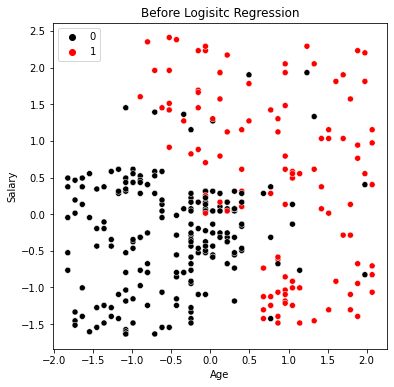

In [48]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_train,palette=["black","red"])
plt.title("Before Logisitc Regression")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

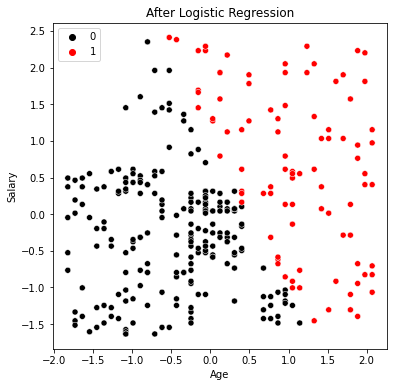

In [49]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],hue=y_train_pred,palette=["black","red"])
plt.title("After Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

### Testing Data

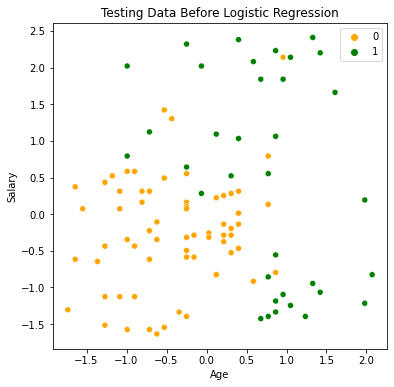

In [53]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=x_test[:,0],y=x_test[:,1],hue=y_test,palette=["orange","green"])
plt.title("Testing Data Before Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

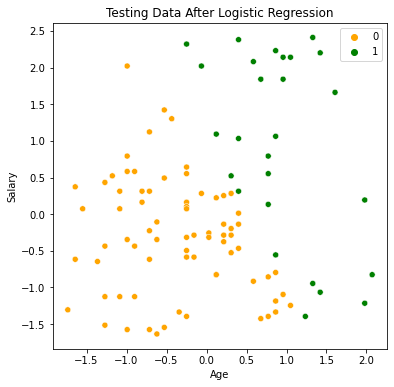

In [54]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=x_test[:,0],y=x_test[:,1],hue=y_test_pred,palette=["orange","green"])
plt.title("Testing Data After Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()